In [3]:
import numpy as np
import pandas as pd  # Importing pandas
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load your data here
data = pd.read_csv("C:\\Users\\lefen\\Downloads\\AAPL.csv")  # Using pd.read_csv
# Convert the 'Date' column to a proper date format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
# Extract the closing prices and reshape for scaling
close_prices = data['Close'].values.reshape(-1, 1)

# Scale the data to [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Create a data structure with 60 time steps and 1 output
X = []
y = []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [10]:
from sklearn.model_selection import train_test_split
from keras.layers import Dropout  # Importing Dropout layer

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

model = Sequential()

# Add the first LSTM layer and some Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Rest of your model code...


# Add the second LSTM layer and some Dropout regularization
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the third LSTM layer and some Dropout regularization
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the fourth LSTM layer and some Dropout regularization
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [11]:
model.fit(X_train, y_train, epochs=100, batch_size=32)
# Predict the stock price
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Descale to original scale

Epoch 1/100
27/27 [==============================] - 9s 62ms/step - loss: 0.0345
Epoch 2/100
27/27 [==============================] - 2s 64ms/step - loss: 0.0052
Epoch 3/100
27/27 [==============================] - 2s 65ms/step - loss: 0.0046
Epoch 4/100
27/27 [==============================] - 2s 64ms/step - loss: 0.0038
Epoch 5/100
27/27 [==============================] - 2s 60ms/step - loss: 0.0037
Epoch 6/100
27/27 [==============================] - 2s 60ms/step - loss: 0.0049
Epoch 7/100
27/27 [==============================] - 2s 58ms/step - loss: 0.0041
Epoch 8/100
27/27 [==============================] - 2s 58ms/step - loss: 0.0032
Epoch 9/100
27/27 [==============================] - 2s 59ms/step - loss: 0.0034
Epoch 10/100
27/27 [==============================] - 2s 60ms/step - loss: 0.0030
Epoch 11/100
27/27 [==============================] - 2s 61ms/step - loss: 0.0032
Epoch 12/100
27/27 [==============================] - 2s 64ms/step - loss: 0.0031
Epoch 13/100
27/27 [=====

1/1 [==============================] - 0s 28ms/step
[[194.54706]
 [194.70146]
 [194.87888]
 [195.09845]
 [195.35309]
 [195.62794]
 [195.90941]
 [196.18956]
 [196.46452]
 [196.73277]]


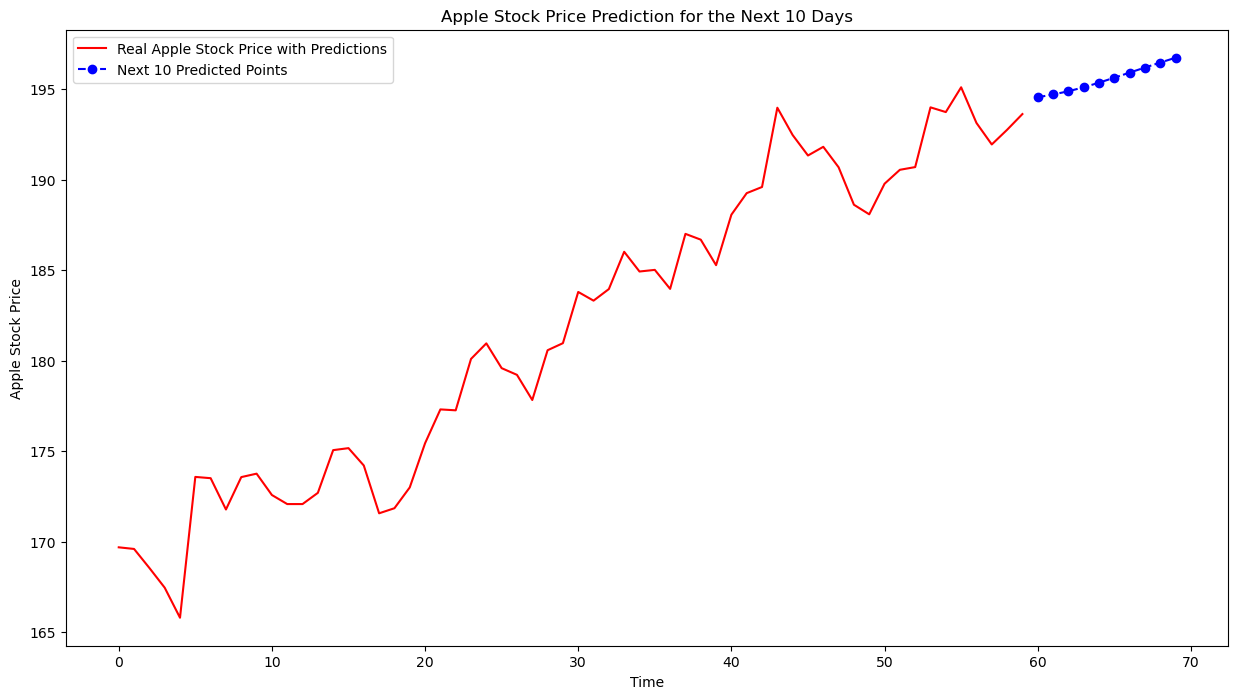

In [12]:
# Forecast the next 10 days
input_data = scaled_data[-60:].reshape(1, -1)  # Take the last 60 scaled values
input_data = np.array(input_data)
input_data = np.reshape(input_data, (input_data.shape[0], input_data.shape[1], 1))

forecasted_prices = []

for _ in range(10):
    forecasted_price = model.predict(input_data)
    forecasted_prices.append(forecasted_price[0,0])
    new_input = np.array([[[forecasted_price[0,0]]]])
    input_data = np.concatenate((input_data[:, 1:, :], new_input), axis=1)

# Convert the forecasted prices back to original scale
forecasted_prices = scaler.inverse_transform(np.array(forecasted_prices).reshape(-1, 1))

print(forecasted_prices)
# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.plot(data['Close'].values[-60:], color="red", label="Real Apple Stock Price with Predictions")
plt.plot(np.arange(60, 70), forecasted_prices, color="blue", linestyle="--", marker="o", label="Next 10 Predicted Points")
plt.title("Apple Stock Price Prediction for the Next 10 Days")
plt.xlabel("Time")
plt.ylabel("Apple Stock Price")
plt.legend()
plt.show()

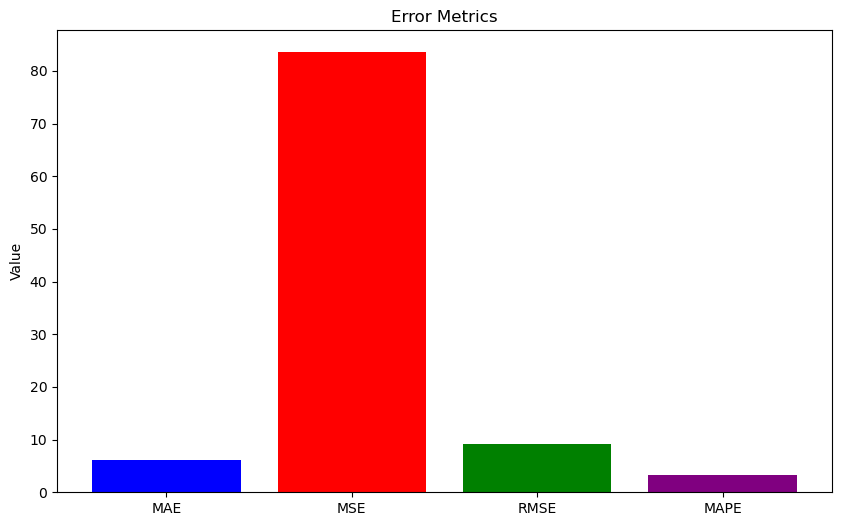

[6.062229999999994, 83.5363722068799, 9.139823423178367, 3.32264863324596]

In [13]:
import numpy as np
# Given LSTM model's predicted prices
lstm_predicted_prices = np.array([194.54706,194.70146,194.87888,195.09845,195.35309,195.62794,
                                  195.90941,196.18956,196.46452,196.73277])

# Provided actual prices for the next 10 days
actual_prices_next_10 = np.array([194.50, 193.22, 195.83, 196.45, 195.61, 192.58, 191.17, 181.99, 178.85, 179.80])

# Calculate the errors using the provided actual values and the LSTM predictions
errors = lstm_predicted_prices - actual_prices_next_10

# Calculate the error metrics
MAE = np.mean(np.abs(errors))
MSE = np.mean(errors**2)
RMSE = np.sqrt(MSE)
MAPE = np.mean(np.abs(errors / actual_prices_next_10)) * 100

MAE, MSE, RMSE, MAPE
# Plotting the error metrics
error_metrics = [MAE, MSE, RMSE, MAPE]
labels = ['MAE', 'MSE', 'RMSE', 'MAPE']

plt.figure(figsize=(10, 6))
plt.bar(labels, error_metrics, color=['blue', 'red', 'green', 'purple'])
plt.title('Error Metrics')
plt.ylabel('Value')
plt.show()

error_metrics